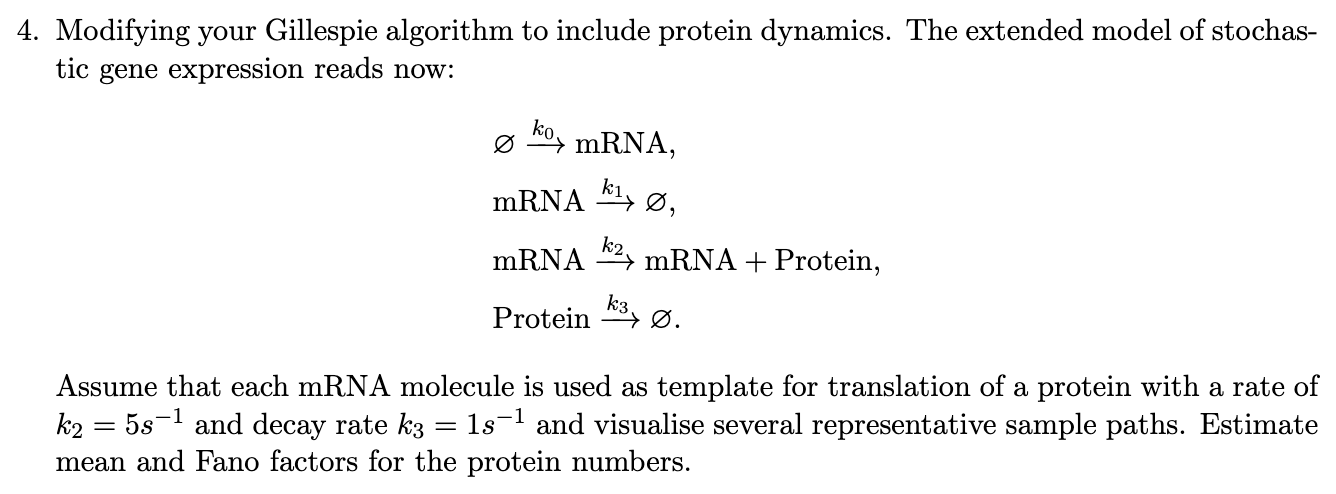


We now have two different processes:

1. mRNA production and degradation
2. Protein production and degradation

We assume a constant mRNA level for a timestep to calculate 2.


In [1]:
from ssa_ex4 import SSA_w_protein

ssa = SSA_w_protein(
    k0_mRNA_production_rate=0.2,
    k1_mRNA_degradation_rate=0.01,
    k2_protein_production_rate=5,
    k3_protein_degradation_rate=1,
)

In [2]:
simulation_results = []

for i in range(5):
    print(f"Starting simulation no. {i} ...")
    simulation_results.append(
        ssa.run_simulation(
            timesteps=5000,
            initial_mRNA_level=0,
            start_time=0.0,
            timestep_sec=1,
        )
    )

Starting simulation no. 0 ...
Starting simulation no. 1 ...
Starting simulation no. 2 ...
Starting simulation no. 3 ...
Starting simulation no. 4 ...


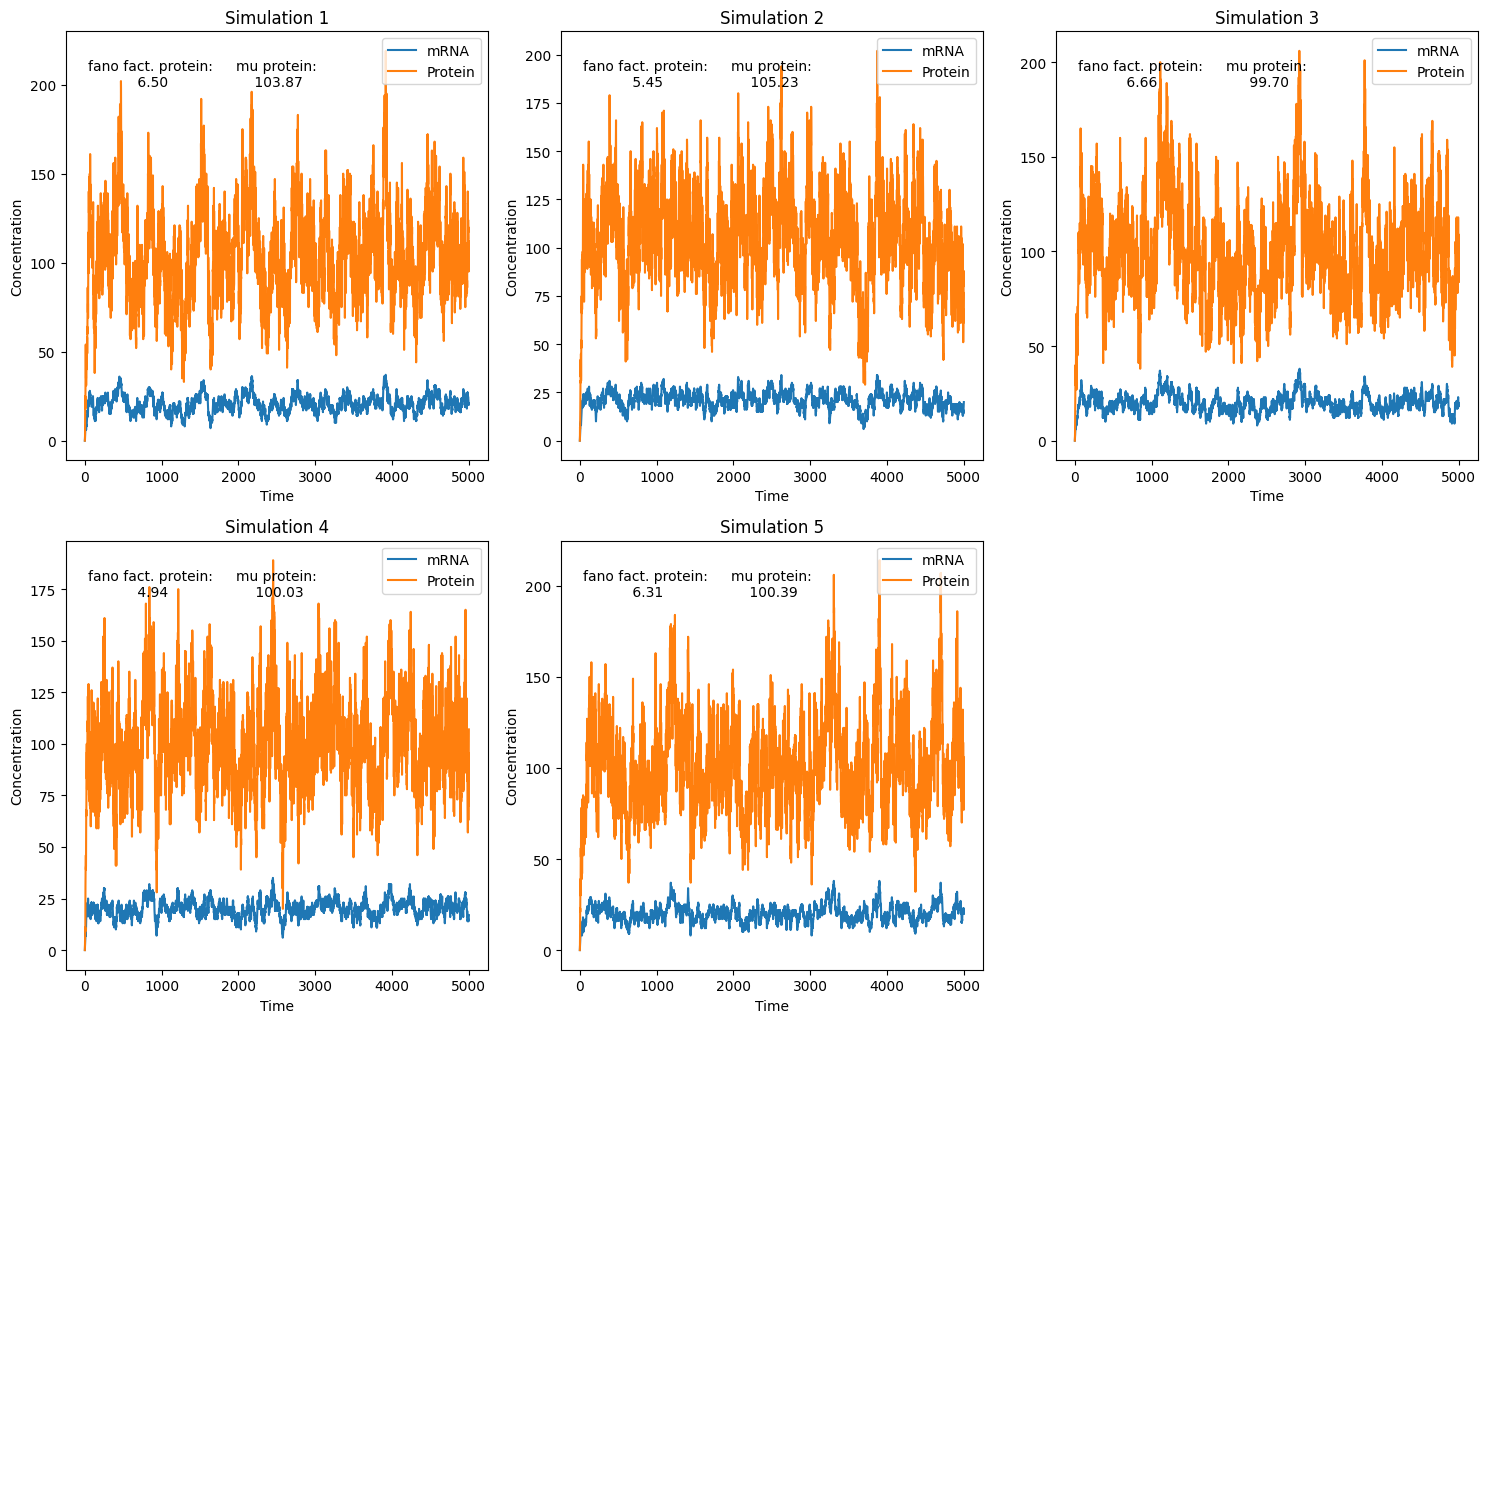

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_sims = len(simulation_results)

# Determine the grid size (for example, square root rounded up for both rows and columns)
grid_size = int(np.ceil(np.sqrt(num_sims)))

# Create subplots
fig, axs = plt.subplots(
    grid_size, grid_size, figsize=(15, 15)
)  # Adjust figsize as needed

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each simulation
for i, sim in enumerate(simulation_results):
    # Plot mRNA
    axs[i].plot(sim["time"], sim["mRNA"], label="mRNA")

    # Plot protein on the same subplot
    axs[i].plot(sim["time"], sim["protein"],
                label="Protein")  # This line is added

    # Labeling and titling
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Concentration")
    axs[i].set_title(f"Simulation {i+1}")
    axs[i].text(
        0.5,
        0.9,
        f"mu protein:\n {np.mean(sim['protein']):.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[i].transAxes,
    )
    axs[i].text(
        0.2,
        0.9,
        f"fano fact. protein:\n {np.var(sim['protein'])/np.mean(sim['protein']):.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[i].transAxes,
    )

    # Add a legend to distinguish between mRNA and Protein in right upper corner
    axs[i].legend(loc="upper right")

# Hide any unused subplots
for i in range(num_sims, len(axs)):
    axs[i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

### Steady State


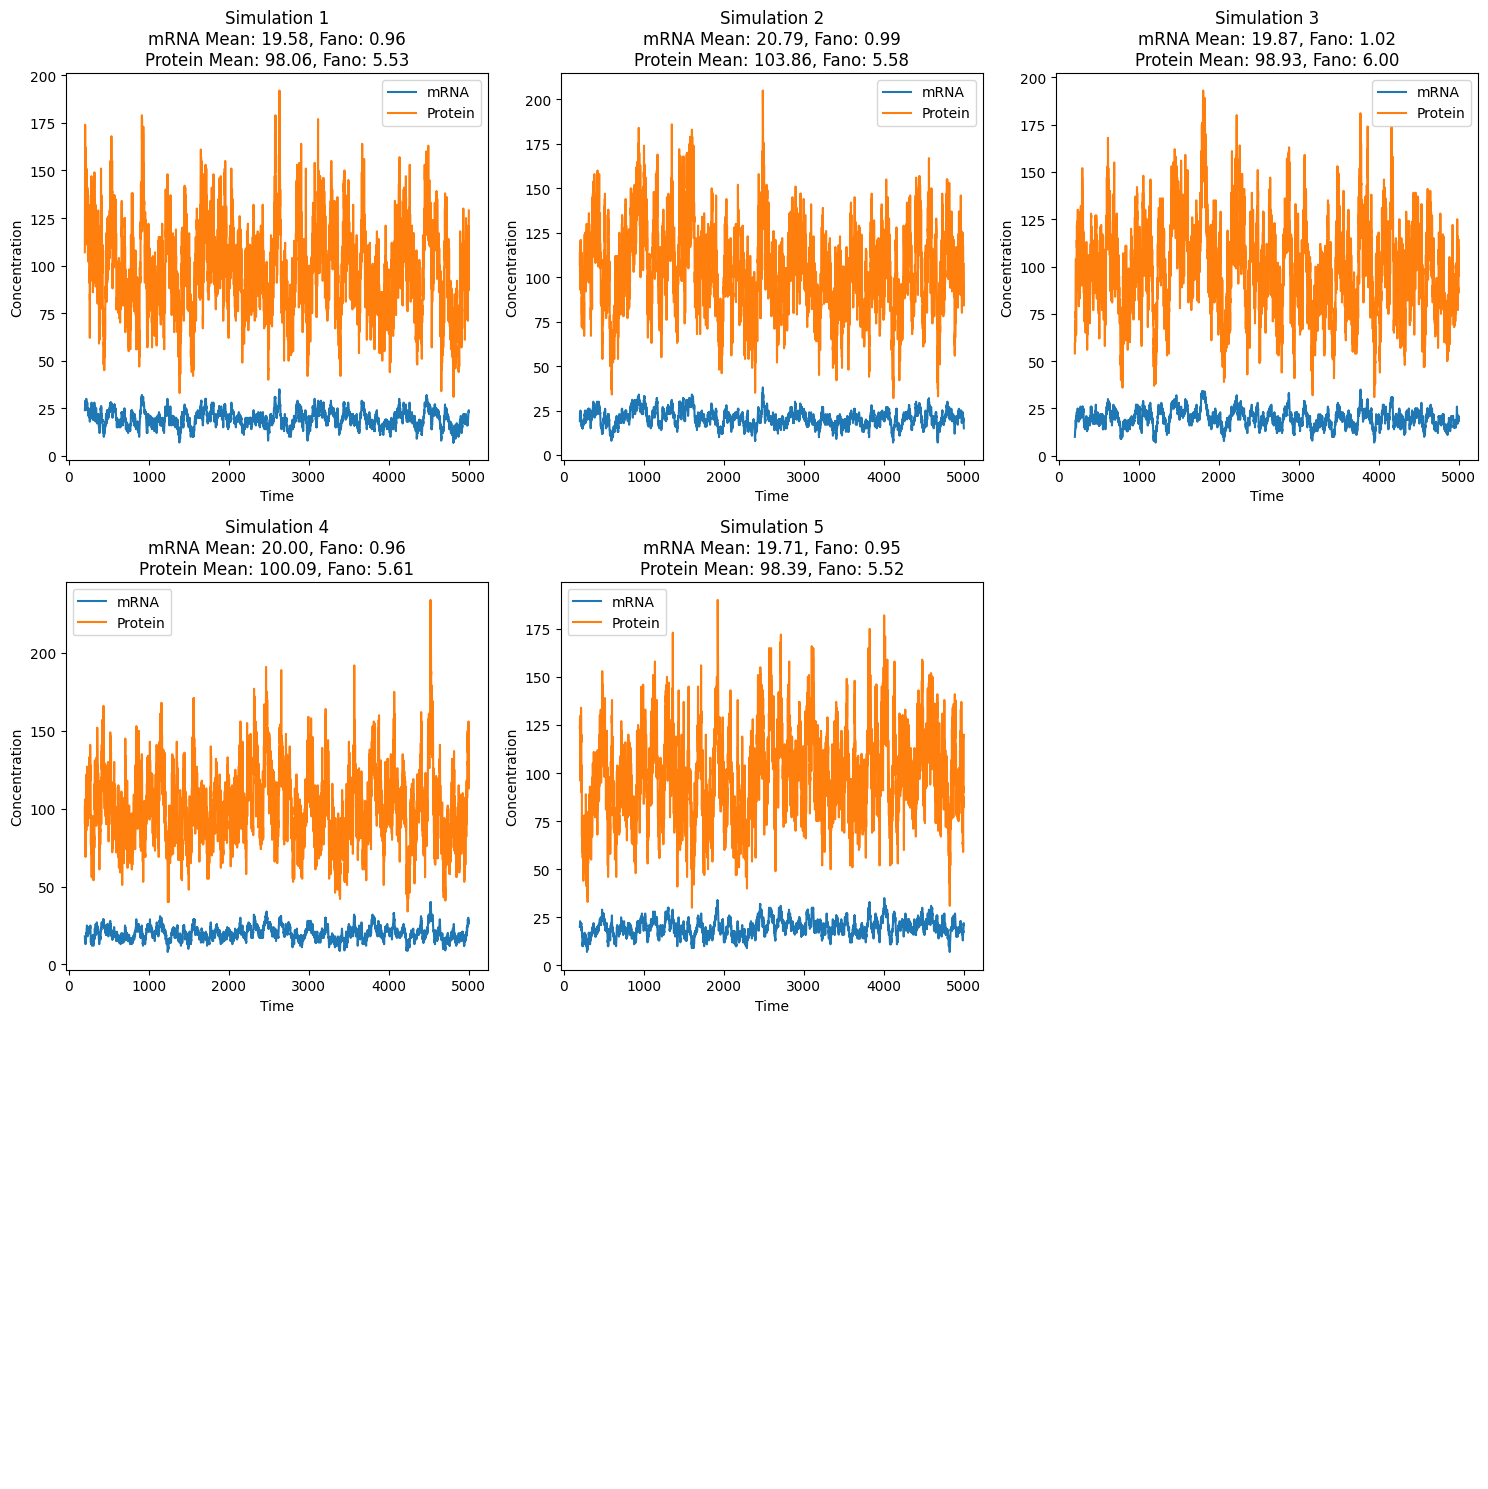

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_sims = len(simulation_results)

# Determine the grid size
grid_size = int(np.ceil(np.sqrt(num_sims)))

# Create subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each simulation and calculate mean and Fano factor
for i, sim in enumerate(simulation_results):
    # Slicing the arrays
    cutoff = 200
    time_slice = sim["time"][cutoff:]
    mRNA_slice = sim["mRNA"][cutoff:]
    protein_slice = sim["protein"][cutoff:]

    # Calculate mean and Fano factor for mRNA and protein
    mean_mRNA = np.mean(mRNA_slice)
    fano_mRNA = np.var(mRNA_slice) / mean_mRNA

    mean_protein = np.mean(protein_slice)
    fano_protein = np.var(protein_slice) / mean_protein

    # Plot mRNA and protein
    axs[i].plot(time_slice, mRNA_slice, label="mRNA")
    axs[i].plot(time_slice, protein_slice, label="Protein")

    # Labeling and titling
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Concentration")
    axs[i].set_title(
        f"Simulation {i+1}\n"
        f"mRNA Mean: {mean_mRNA:.2f}, Fano: {fano_mRNA:.2f}\n"
        f"Protein Mean: {mean_protein:.2f}, Fano: {fano_protein:.2f}"
    )

    # Add a legend
    axs[i].legend()

# Hide any unused subplots
for i in range(num_sims, len(axs)):
    axs[i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()